In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np

from sklearn import linear_model, svm, metrics
from sklearn.datasets import make_moons, make_circles, make_classification

# Generate data, split into training and test

In [48]:
#allX, ally = make_moons(n_samples=150, noise=0.3)
allX, ally = make_circles(n_samples=150, noise=0.2, factor=0.5)

allX.shape, ally.shape

((150, 2), (150,))

In [49]:
# separate out the training data
X = allX[:100]
y = ally[:100]

testX = allX[100:]
testy = ally[100:]

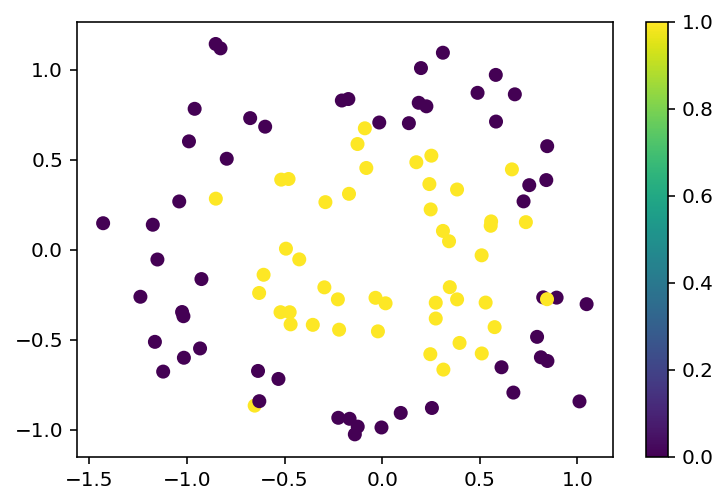

In [50]:
plt.scatter(X[:,0], X[:,1], c=y); plt.colorbar()

# Fit Logistic Regression model

In [51]:
# create model object
lr_model = linear_model.LogisticRegressionCV()

# fit model using training data
lr_model.fit(X, y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [11]:
# test inidivual points
#lr_model.predict([[0, 1.5]])
lr_model.decision_function([[0, 1.5]])

array([-1.05645342])

# Fit SVC classifier

In [62]:
svc_model = svm.SVC()
svc_model.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [63]:
svc_model.decision_function([[0, 1.5]])

array([-2.89535666])

# Visualization of the classifier

In [64]:
# create a bunch of points
x1, x2 = np.meshgrid(np.linspace(allX.min(), allX.max(), 50),
                     np.linspace(allX.min(), allX.max(), 50))
bigX = np.vstack([x1.ravel(), x2.ravel()]).T

In [65]:
x1.shape

(50, 50)

In [66]:
x1.ravel().shape

(2500,)

In [67]:
bigX.shape

(2500, 2)

In [68]:
#bigy = lr_model.decision_function(bigX)
bigy = svc_model.decision_function(bigX)

In [69]:
bigy.shape

(2500,)

Text(0,0.5,'X2')

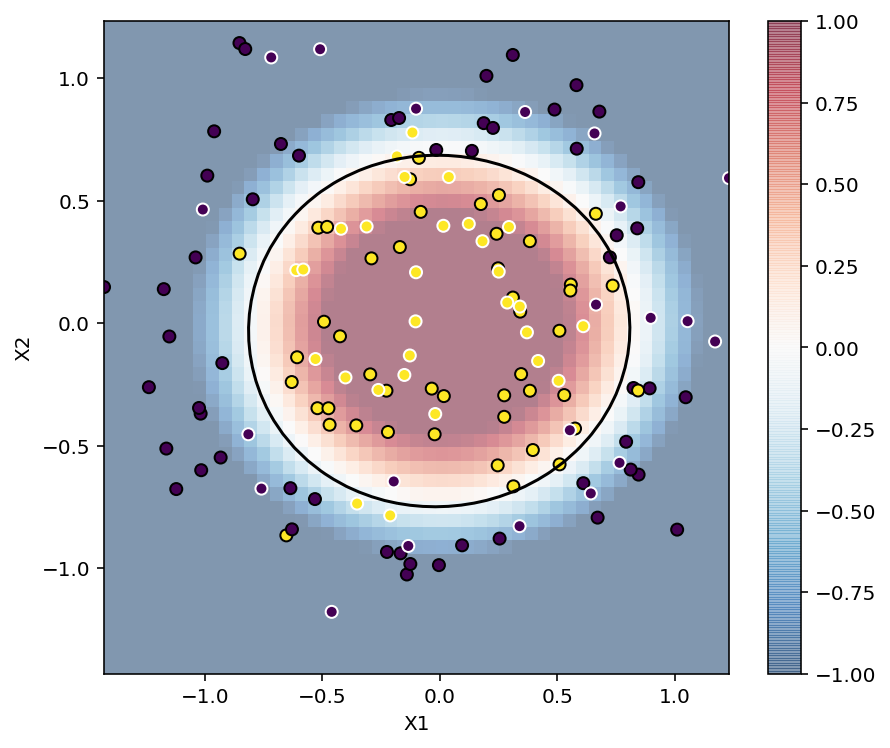

In [70]:
plt.figure(figsize=(7,6))
plt.pcolor(x1, x2, bigy.reshape(x1.shape), alpha=0.5, snap=True,
           cmap='RdBu_r', vmin=-1, vmax=1)
plt.colorbar()
plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k')
plt.scatter(testX[:,0], testX[:,1], c=testy, edgecolors='white')
plt.contour(x1, x2, bigy.reshape(x1.shape), [0], colors='k')
plt.xlim(allX.min(), allX.max())
plt.ylim(allX.min(), allX.max())
plt.xlabel("X1")
plt.ylabel("X2")

# Test classifiers using ROC analysis

In [71]:
predy = svc_model.decision_function(testX)
#predy = lr_model.decision_function(testX)
predy.shape

(50,)

In [72]:
testy

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1])

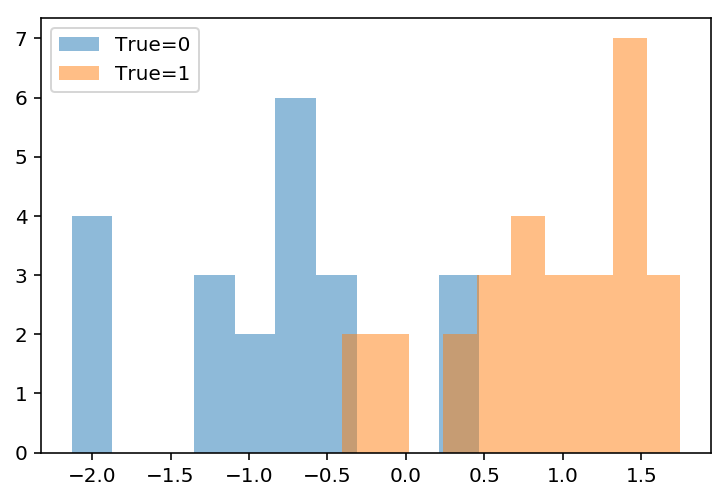

In [73]:
plt.hist(predy[testy==0], alpha=0.5, label='True=0')
plt.hist(predy[testy==1], alpha=0.5, label='True=1')
plt.legend();

In [74]:
thresholds = np.linspace(predy.min(), predy.max(), 500)

tpr = np.zeros(len(thresholds))
fpr = np.zeros(len(thresholds))

for ii,t in enumerate(thresholds):
    tpr[ii] = (predy[testy==1] > t).mean()
    fpr[ii] = (predy[testy==0] > t).mean()

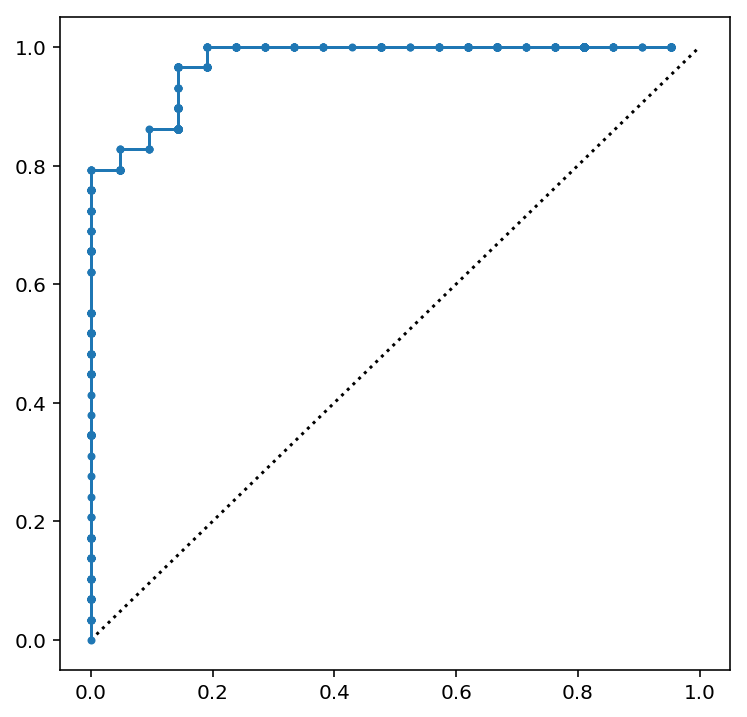

In [75]:
plt.figure(figsize=(6,6))
plt.plot([0,1], [0,1], 'k:')
plt.plot(fpr, tpr, '.-')

In [76]:
# from sklearn.metrics
metrics.roc_auc_score(testy, predy)

0.9737274220032841